In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
X_train = pd.read_csv('../data/processed/X_train_l2.csv')
X_test = pd.read_csv('../data/processed/X_test_l2.csv')
y_train_bin = pd.read_csv('../data/processed/y_train_binary.csv')
y_test_bin = pd.read_csv('../data/processed/y_test_binary.csv')

In [3]:
print(X_train.shape, y_train_bin.shape)
print(X_test.shape, y_test_bin.shape)

(125973, 122) (125973, 1)
(22544, 122) (22544, 1)


In [4]:
# Binary label mapping
label_map = {
    'normal': 0,
    'attack': 1
}

y_train_bin['binary_label'] = y_train_bin['binary_label'].map(label_map)
y_test_bin['binary_label']  = y_test_bin['binary_label'].map(label_map)

y_train_bin = y_train_bin['binary_label']
y_test_bin  = y_test_bin['binary_label']



In [5]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train,y_train_bin.values.ravel())
y_pred_bin=gnb.predict(X_test)


Gaussian Naive Bayes (GNB) is a probabilistic supervised learning algorithm based on Bayes’ theorem. The model assumes that features are conditionally independent given the class label and that continuous features follow a Gaussian (normal) distribution. Despite its simplifying assumptions, Gaussian Naive Bayes is computationally efficient and performs well on high-dimensional datasets, making it a suitable baseline classifier for intrusion detection tasks.

Binary Classification Formulation

In the binary intrusion detection task, network traffic instances were categorized into two classes:

Normal traffic

Intrusive traffic

All attack types present in the dataset were grouped under a single intrusion category. This formulation focuses on detecting the presence of malicious activity rather than identifying specific attack types, enabling faster and more efficient classification.

Implementation Details

The Gaussian Naive Bayes classifier was implemented for binary intrusion detection using continuous-valued network traffic features. Since Gaussian Naive Bayes models the distribution of each feature independently, no feature interaction modeling was required.

Feature normalization was not strictly required; however, the model assumes that feature distributions follow a Gaussian form within each class. The classifier estimates the mean and variance of each feature for both normal and intrusive traffic classes during training.

Due to its probabilistic nature and low computational overhead, Gaussian Naive Bayes was trained on the full binary dataset without the need for subsampling



Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.99      0.64      9711
           1       0.97      0.17      0.30     12833

    accuracy                           0.53     22544
   macro avg       0.72      0.58      0.47     22544
weighted avg       0.76      0.53      0.45     22544



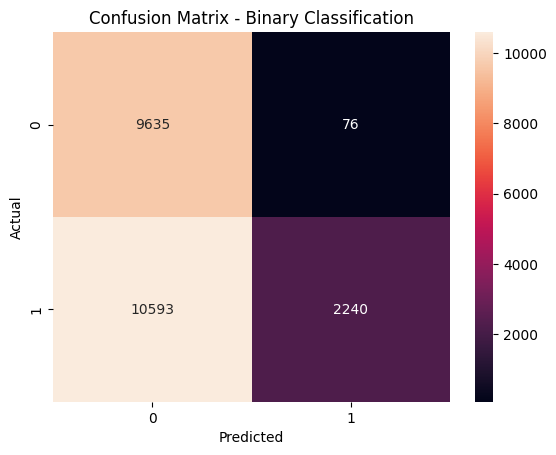

In [6]:
from sklearn.metrics import classification_report,confusion_matrix

y_prob_bin=gnb.predict_proba(X_test)[:,1]

print("Classification Report:\n",classification_report(y_test_bin,y_pred_bin))
cm=confusion_matrix(y_test_bin,y_pred_bin)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Binary Classification')
plt.show()

Evaluation Metrics

Model performance was evaluated using standard binary classification metrics, including precision, recall, F1-score, and accuracy. Confusion matrices were used to analyze classification outcomes and to quantify the number of true positives, false positives, true negatives, and false negatives.

Given the imbalanced nature of intrusion detection datasets, particular emphasis was placed on recall and F1-score to assess the model’s ability to correctly identify intrusive traffic.

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc_bin=RandomForestClassifier(
    n_estimators=5,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    class_weight='balanced',
    max_features='sqrt',
    random_state=42)

rfc_bin.fit(X_train,y_train_bin.values.ravel())
y_pred_rfc_bin=rfc_bin.predict(X_test)
y_prob_rfc_bin=rfc_bin.predict_proba(X_test)[:,1]

Random Forest is an ensemble-based supervised learning algorithm that constructs a collection of decision tree classifiers during training and aggregates their predictions to produce a final output. By combining multiple estimators, Random Forest reduces variance and improves robustness compared to individual decision trees. This ensemble strategy makes Random Forest particularly effective for intrusion detection tasks, where the decision boundaries between normal and malicious traffic can be complex and nonlinear.

**Binary Classification Formulation**

In the binary intrusion detection task, network traffic instances were classified into two categories:

*Normal traffic*

*Intrusive traffic*

All attack types present in the dataset were grouped under a single intrusion class. This formulation simplifies the detection problem and focuses on identifying whether a network connection is malicious, rather than determining the specific type of attack.

**Implementation Details**

The Random Forest classifier was implemented using an ensemble of five decision tree estimators. This choice was motivated by prior studies demonstrating that a small number of shallow estimators can achieve competitive performance while maintaining low computational complexity.

Due to the large size of the dataset, a randomly sampled subset was used for training and evaluation. This approach significantly reduced training time while preserving the underlying distribution of normal and attack traffic. Since Random Forest models are invariant to feature scaling, no additional normalization was required for training.

The final class prediction was obtained by majority voting across all estimators.

Classification Report 
               precision    recall  f1-score   support

           0       0.66      0.97      0.79      9711
           1       0.97      0.62      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.82      0.80      0.77     22544
weighted avg       0.84      0.77      0.77     22544



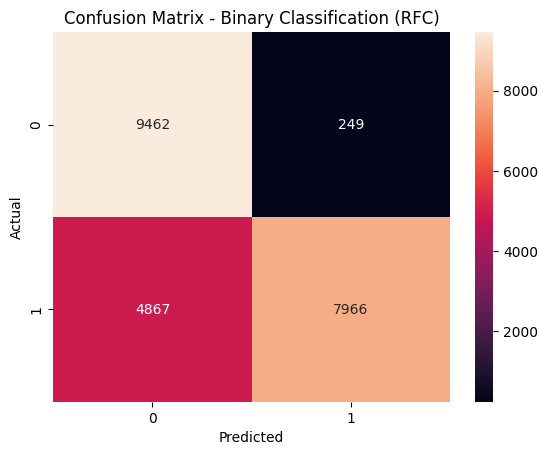

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

print("Classification Report \n" , classification_report(y_test_bin,y_pred_rfc_bin))
cm=confusion_matrix(y_test_bin,y_pred_rfc_bin)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Binary Classification (RFC)")
plt.show()

**Training Configuration**

Number of estimators: 5

Task: Binary classification (normal vs intrusion)

Sampling strategy: Random subset selection to reduce computational cost

Feature scaling: Not required

Decision strategy: Majority voting

**Evaluation Metrics**

Model performance was evaluated using standard binary classification metrics, including precision, recall, and F1-score. Additionally, confusion matrices were used to analyze the distribution of true positives, false positives, true negatives, and false negatives.

Accuracy alone was not considered sufficient to assess model performance due to potential class imbalance. Therefore, emphasis was placed on recall and F1-score to evaluate the model’s ability to correctly detect intrusions.

In [30]:
import numpy as np

sample_ratio = 0.5  # 0.05%

idx_train = np.random.choice(
    len(X_train),
    size=int(len(X_train) * sample_ratio),
    replace=False
)

idx_test = np.random.choice(
    len(X_test),
    size=int(len(X_test) * sample_ratio),
    replace=False
)

X_train_svm = X_train.iloc[idx_train]
y_train_svm = y_train_bin.iloc[idx_train]

X_test_svm  = X_test.iloc[idx_test]
y_test_svm  = y_test_bin.iloc[idx_test]

In [31]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(
    C=1.0,
    max_iter=5000,
    random_state=42
)

svm_model.fit(X_train_svm, y_train_svm)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = svm_model.predict(X_test_svm)

print(
    classification_report(
        y_test_svm,
        y_pred,
        target_names=["normal", "attack"]
    )
)


              precision    recall  f1-score   support

      normal       0.61      0.91      0.73      4843
      attack       0.90      0.55      0.68      6429

    accuracy                           0.71     11272
   macro avg       0.75      0.73      0.71     11272
weighted avg       0.77      0.71      0.70     11272



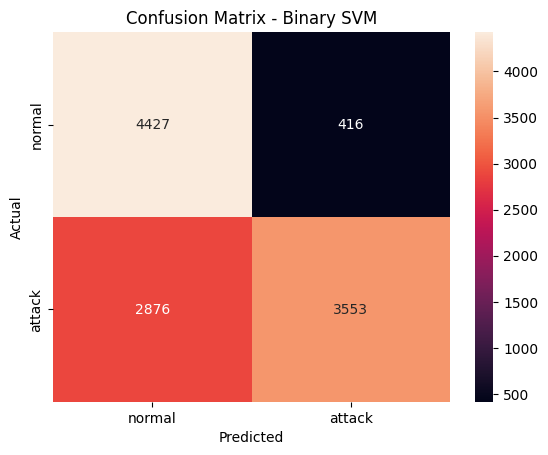

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_svm, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=["normal", "attack"],
    yticklabels=["normal", "attack"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Binary SVM")
plt.show()


              precision    recall  f1-score   support

      normal       0.65      0.97      0.78      4843
      attack       0.97      0.61      0.75      6429

    accuracy                           0.76     11272
   macro avg       0.81      0.79      0.76     11272
weighted avg       0.83      0.76      0.76     11272



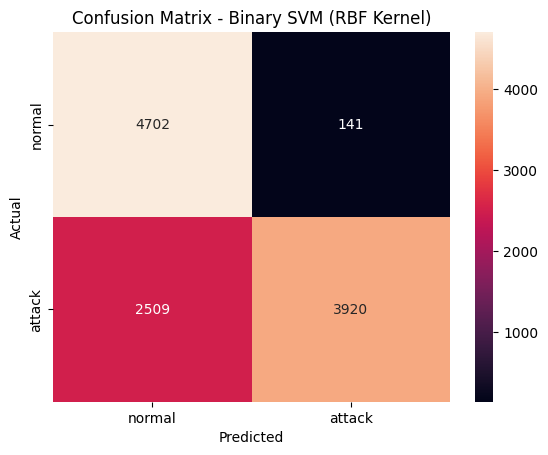

In [39]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

svm_model.fit(X_train_svm, y_train_svm)
from sklearn.metrics import classification_report, confusion_matrix
y_pred = svm_model.predict(X_test_svm)
print(
    classification_report(
        y_test_svm,
        y_pred,
        target_names=["normal", "attack"]
    )
)
cm = confusion_matrix(y_test_svm, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=["normal", "attack"],
    yticklabels=["normal", "attack"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Binary SVM (RBF Kernel)")
plt.show()

**Overview**

Support Vector Machines (SVMs) are supervised machine learning algorithms that aim to separate data points by constructing an optimal hyperplane that maximizes the margin between different classes. By maximizing this margin, SVMs are able to effectively capture the spatial distribution of data in high-dimensional feature spaces, making them suitable for intrusion detection problems where feature interactions are complex.

**Implementation**

Although SVMs can be extended to multiclass classification using strategies such as one-vs-one or one-vs-rest, they are primarily designed for binary classification. Therefore, in this work, the SVM was employed only for binary intrusion detection, where the objective was to classify network traffic as either normal or intrusive. The SVM was not used to classify specific attack categories.

Due to the high computational cost associated with SVM training on large-scale datasets, a randomly sampled subset of the dataset was used for training and evaluation. This approach allowed feasible training times while preserving the essential characteristics of the data distribution. The binary SVM results are reported separately in the results section.

Support Vector Machines (SVMs) are supervised learning algorithms that aim to separate data samples by constructing an optimal decision boundary that maximizes the margin between different classes. By focusing on support vectors—data points that lie closest to the decision boundary—SVMs are able to achieve strong generalization performance, particularly in high-dimensional feature spaces common in intrusion detection datasets.

2) Binary Classification Formulation

In the binary intrusion detection task, network traffic instances were classified into two categories:

Normal traffic

Intrusive traffic

All attack types were grouped into a single intrusion class. This formulation emphasizes the detection of malicious activity rather than the identification of specific attack categories and is consistent with the binary intrusion detection objective.

3) Kernel Functions

Two kernel configurations were evaluated in this work:

a) Linear Kernel

The linear kernel constructs a linear decision boundary in the original feature space. It is computationally efficient and well-suited for high-dimensional datasets where classes are approximately linearly separable. The linear SVM was employed to provide a fast and interpretable baseline for binary intrusion detection.

b) Radial Basis Function (RBF) Kernel

The Radial Basis Function (RBF) kernel enables SVMs to model nonlinear decision boundaries by mapping input features into a higher-dimensional space. This allows the classifier to capture complex relationships between features, making it suitable for intrusion detection scenarios where attack patterns are not linearly separable.

mplementation Details

Both Linear and RBF SVM models were implemented for binary intrusion detection. Due to the high computational cost associated with SVM training on large-scale datasets, a randomly sampled subset of the dataset was used for model training and evaluation. Feature normalization was applied prior to training to ensure that all features contributed equally to the distance-based kernel computations.

For the linear kernel, a linear SVM formulation was used to improve training efficiency. For the RBF kernel, the kernel scale parameter was automatically determined based on the feature variance.

5) Training Configuration

Classification task: Binary (normal vs intrusion)

Kernel types: Linear and RBF

Sampling strategy: Random subset selection

Feature scaling: Applied prior to training

Decision strategy: Maximum-margin classification

6) Evaluation Metrics

Model performance was evaluated using precision, recall, F1-score, and accuracy. Confusion matrices were used to analyze classification outcomes and assess the model’s ability to correctly distinguish normal traffic from intrusive behavior.

Given the imbalanced nature of intrusion detection datasets, recall and F1-score were emphasized over accuracy to ensure reliable detection of intrusion events.

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model_binary = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_binary.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    "best_ann_model.h5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)


history_binary = model_binary.fit(
    X_train,
    y_train_bin,
    validation_data=(X_test, y_test_bin),
    epochs=200,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)




C:\Users\Shantanu Ojha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9441 - loss: 0.1711 - val_accuracy: 0.7468 - val_loss: 0.9271
Epoch 2/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9683 - loss: 0.0864 - val_accuracy: 0.7585 - val_loss: 0.9147
Epoch 3/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0693 - val_accuracy: 0.7552 - val_loss: 1.0600
Epoch 4/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.0606 - val_accuracy: 0.7728 - val_loss: 1.1836
Epoch 5/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9812 - loss: 0.0539 - val_accuracy: 0.7465 - val_loss: 1.3896
Epoch 6/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9841 - loss: 0.0485 - val_accuracy: 0.7815 - val_loss: 1.2534
Epoch 7/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0444 - val_accuracy: 0.7657 - val_loss: 1.3588
Epoch 8/200
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9876 - loss: 0.0407 - val_accu

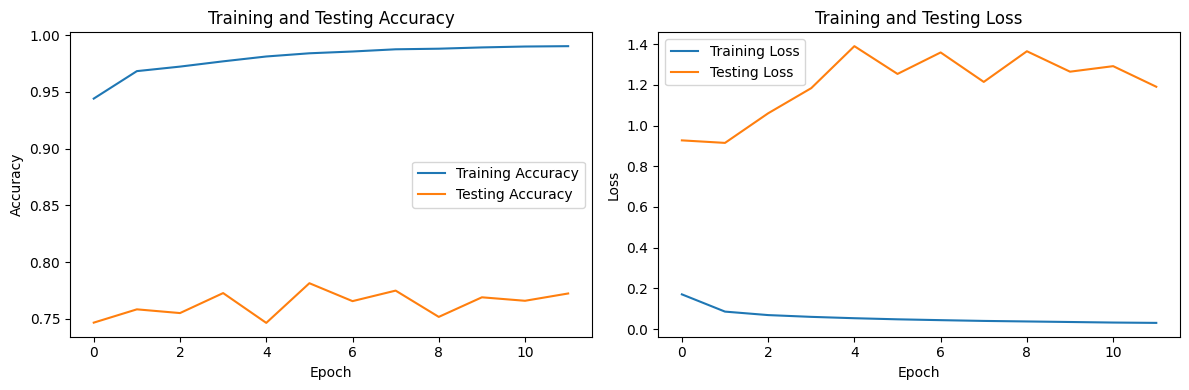

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history_binary.history['accuracy'], label='Training Accuracy')
plt.plot(history_binary.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_binary.history['loss'], label='Training Loss')
plt.plot(history_binary.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

705/705 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.77      9711
           1       0.93      0.63      0.75     12833

    accuracy                           0.76     22544
   macro avg       0.79      0.78      0.76     22544
weighted avg       0.81      0.76      0.76     22544



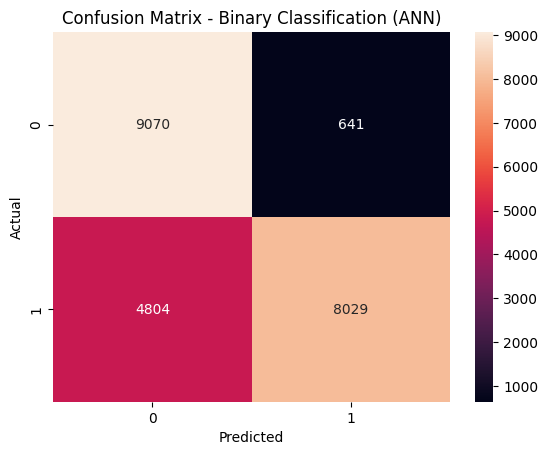

In [14]:
y_prob_ann = model_binary.predict(X_test)
y_pred_ann = (y_prob_ann >= 0.5).astype(int).ravel()
y_true_ann = y_test_bin.astype(int).values


# Metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n",
      classification_report(y_true_ann, y_pred_ann))

cm = confusion_matrix(y_true_ann, y_pred_ann)

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Binary Classification (ANN)")
plt.show()

Artificial Neural Networks (ANNs) are computational models inspired by the structure and functioning of biological neural systems. ANNs consist of interconnected layers of neurons that learn hierarchical feature representations through nonlinear transformations. Due to their ability to model complex decision boundaries, ANNs have been widely adopted in intrusion detection systems to distinguish between normal and malicious network traffic.

2) Binary Classification Formulation

In the binary intrusion detection task, network traffic instances were classified into two categories:

Normal traffic

Intrusive traffic

All attack types present in the dataset were grouped into a single intrusion class. This formulation simplifies the detection problem by focusing on the presence of malicious activity rather than the identification of specific attack categories.

3) Network Architecture

A fully connected feed-forward neural network architecture was implemented for binary intrusion detection. The network consisted of multiple dense layers designed to capture nonlinear relationships among network traffic features.

The architecture comprised:

Two hidden layers with ReLU activation functions

A single-node output layer with a sigmoid activation function

The sigmoid activation enabled the network to output a probability score indicating the likelihood of a network connection being intrusive.

4) Implementation Details

The ANN was trained using the binary cross-entropy loss function, which is well-suited for probabilistic binary classification tasks. The Adam optimization algorithm was employed to update network weights efficiently during training.

To ensure stable training and improve convergence, feature normalization was applied prior to training. Early stopping was used as a regularization strategy to prevent overfitting by terminating training when the validation loss ceased to improve.

5) Training Configuration

Classification task: Binary (normal vs intrusion)

Hidden layers: Two fully connected layers

Activation functions: ReLU (hidden layers), Sigmoid (output layer)

Loss function: Binary cross-entropy

Optimizer: Adam

Regularization: Early stopping

6) Evaluation Metrics

Model performance was evaluated using precision, recall, F1-score, and accuracy. Confusion matrices were employed to analyze classification results and to quantify false positives and false negatives.

Given the imbalanced nature of intrusion detection datasets, recall and F1-score were emphasized over accuracy to better assess the model’s ability to detect intrusive traffic.